In [43]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA

Price based ARIMA and naive modell 

In [44]:
df = yf.download("AAPL", start="2015-01-01", end=None)
df = df[["Close"]].copy()
df = df.rename(columns={"Close": "price"})

df.head()

/tmp/ipykernel_24509/124293998.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2015-01-01", end=None)
[*********************100%***********************]  1 of 1 completed


Price,price
Ticker,AAPL
Date,
2015-01-02,24.237549
2015-01-05,23.554739
2015-01-06,23.556961
2015-01-07,23.887276
2015-01-08,24.805082


In [45]:
df = data[["Close"]].copy()
df = df.dropna()

In [46]:
df.index = pd.to_datetime(df.index)
df = df.sort_index()

In [47]:
df = df.rename(columns={"Close": "price"})

In [48]:
df.shape

(3522, 1)

In [49]:
test_size = 60

train = df.iloc[:-test_size].copy()
test  = df.iloc[-test_size:].copy()

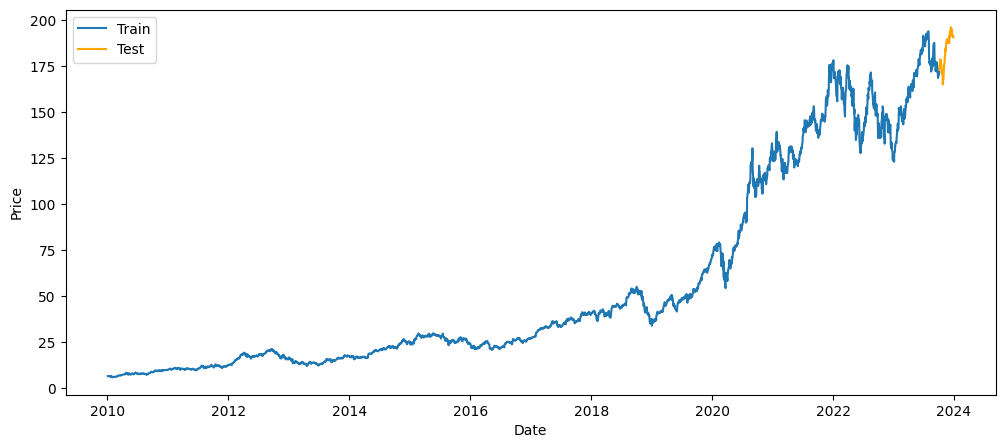

In [50]:
plt.figure(figsize=(12, 5))
plt.plot(train.index, train["price"], label="Train")
plt.plot(test.index,  test["price"], label="Test", color="orange")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [51]:
naive_pred = test["price"].shift(1)

y_true = test["price"].iloc[1:].to_numpy()
y_pred = naive_pred.iloc[1:].to_numpy()

In [52]:
mae_naive = mean_absolute_error(y_true, y_pred)

mape_naive = mean_absolute_percentage_error(y_true, y_pred) * 100

print("Naive MAE :", round(mae_naive, 4))
print("Naive MAPE:", round(mape_naive, 2), "%")

Naive MAE : 1.4394
Naive MAPE: 0.79 %


In [53]:
model = ARIMA(train["price"], order=(1,1,1))
res = model.fit()
res.summary()

/home/brigitta07/projects/forecast-project/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/brigitta07/projects/forecast-project/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/brigitta07/projects/forecast-project/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   AAPL   No. Observations:                 3462
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6143.775
Date:                Mon, 01 Dec 2025   AIC                          12293.550
Time:                        11:21:47   BIC                          12311.998
Sample:                             0   HQIC                         12300.138
                               - 3462                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4727      0.131      3.619      0.000       0.217       0.729
ma.L1         -0.5152      0.128     -4.022      0.000      -0.766      -0.264
sigma2         2.0390      0.019    106.355      0.000       2.001       2.077
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             19069.45
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):             103.71   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
fc = res.forecast(steps=len(test))
fc.index = test.index

/home/brigitta07/projects/forecast-project/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/brigitta07/projects/forecast-project/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [55]:
y_true = test["price"].to_numpy()
y_pred = fc.to_numpy()

arima_mae = mean_absolute_error(y_true, y_pred)
arima_mape = mean_absolute_percentage_error(y_true, y_pred) * 100

print("ARIMA MAE :", arima_mae)
print("ARIMA MAPE:", arima_mape, "%")

ARIMA MAE : 12.385202256408148
ARIMA MAPE: 6.569802062310269 %


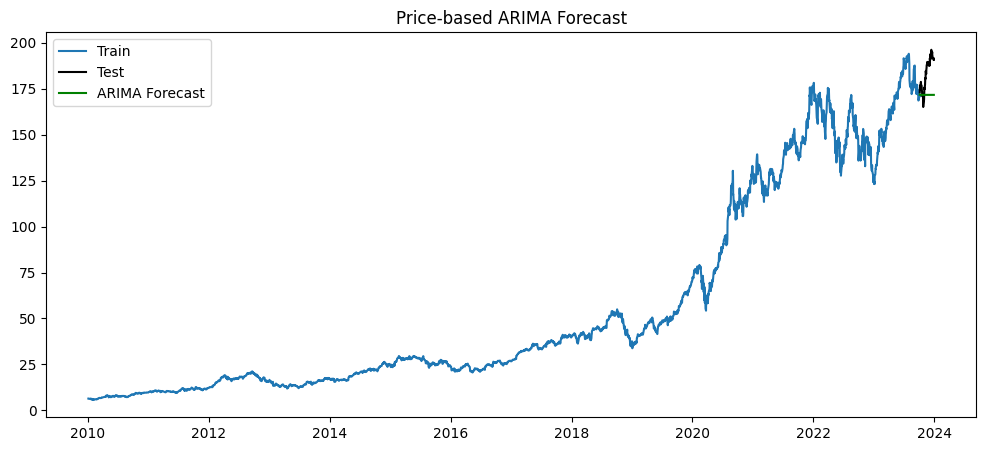

In [41]:
plt.figure(figsize=(12,5))
plt.plot(train["price"], label="Train")
plt.plot(test["price"], label="Test", color="black")
plt.plot(fc, label="ARIMA Forecast", color="green")
plt.legend()
plt.title("Price-based ARIMA Forecast")
plt.show()

Return based ARIMA

In [94]:
returns = np.log(data["Close"]).diff().dropna()
train_r, test_r = returns.iloc[:-60], returns.iloc[-60:]

In [95]:
res_r = ARIMA(train_r, order=(1,0,1)).fit()
pred_r = res_r.forecast(steps=len(test_r))

/home/brigitta07/projects/forecast-project/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/brigitta07/projects/forecast-project/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/brigitta07/projects/forecast-project/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/brigitta07/projects/forecast-project/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No su

In [96]:
last_price = float(data["Close"].dropna().iloc[len(train_r)])
price_forecast = last_price * np.exp(pred_r.cumsum())
price_forecast.index = test_r.index

/tmp/ipykernel_24509/2186152119.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  last_price = float(data["Close"].dropna().iloc[len(train_r)])


In [97]:
y_true = data["Close"].loc[price_forecast.index]
mae = mean_absolute_error(y_true, price_forecast)
mape = mean_absolute_percentage_error(y_true, price_forecast)
print("ARIMA-on-returns MAE:", round(mae,2), "  MAPE:", round(mape*100,2), "%")

ARIMA-on-returns MAE: 8.09   MAPE: 4.32 %
